<a href="https://colab.research.google.com/github/daphnecor/Computational_neuroscience/blob/main/ACNS_Week1_Takehome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Computational Neuroscience
```
Student: Daphne Cornelisse (s1066862)
``` 


# Take Home exercises: Drift Diffusion

Many events in nature are set off when a stochastic process first reaches a threshold. The first passage time (FPT), also referred to as first-hitting time, is the time required for a stochastic process to reach this threshold from an initial state.

Here, we apply the first passage time distribution to model the linear and threshold behaviour of a single neuron. We have the following steps:

1. Let the membrane potential v be the state of a neuron
2. Initialise v at its resting potential (e.g. v=0)
3. Assume that EPSPs increase v by one and IPSPs decrease v by one. The presynaptic events are taken to be random and indepenent:
\begin{align}
  v_{t+1} = v_t + \xi
\end{align}

where $\xi ± 1$ is a random variable with mean $\mu$ and variance $\sigma^2$.
4. Choose a threshold $v_{th}$. Whenever $v$ reaches the threshold, a spike is emitted and $v$ is reset to 0.

We generate first passage times (FPT) from the drift distribution model. Check whether the distribution of these times coincide with the FPT distribution $\rho$ that was given in the lecture.

The continuous time diffusion process can be simulated as 
\begin{align}
  v(t+dt) = v(t) + \mu dt + d \xi
\end{align}
where $\mu$ is the mean drift and $d \xi$ is a Gaussian random variable with mean zero and standard deviation $\sigma\sqrt{dt}$. The FPT is the smallest $t$ that $v(t) > v_{th}$.

## 1. Generate diffusion trajectories

---

> Generate $n$ diffusion trajectories $v_i(t) \text{ for } i = 1, \dots , n$ with $0 < t < T$ and $n$ as large as you can. 
Use $dt = 0.001, \mu = 0.1, \sigma = 0.1, v_{th} = 1$ and total time $T = 20$. 

---

In [ ]:
'''
Dependencies  
'''
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import warnings 
warnings.simplefilter('ignore')
from scipy.stats import kde
sns.set_style('white')
# to change default color cycle
color_scheme = ['#616F85', '#C2BAA3', '#F5E6CE', '#DD9D7C', '#C9445F']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_scheme)
np.random.seed(0) # reproducability

In [ ]:
'''
Parameterise
'''
dt = 0.001 # time step
mu = 0.1 # mean drift
sig = 0.1 # standard deviation 
v_th = 1 # threshold
T = 20 # total time
N = int(T/dt)

t = np.linspace(0, T, N) # time 
v = np.zeros((10000, N)) 

v.shape # trajectory x timesteps

(10000, 20000)

In [ ]:
'''
Generate n diffusion trajectories
'''
for k in range(N):
  if k == 0:
    continue
  else:
    v[:, k] = np.add(v[:, k-1] + mu*dt , np.random.normal(loc=0, scale=sig*np.sqrt(dt), size=(v.shape[0],)))

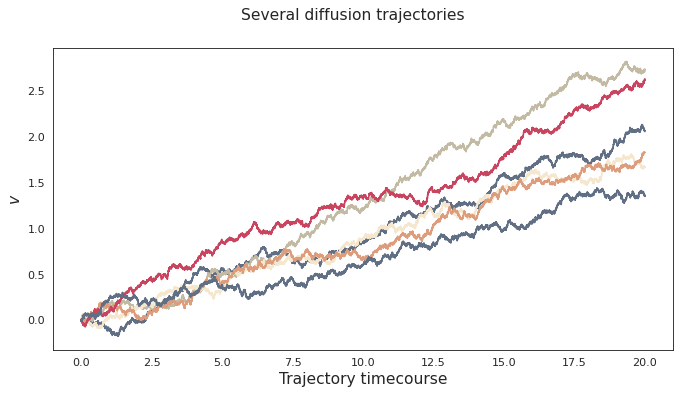

In [ ]:
'''
Plot some diffusion trajectories
'''
fig, ax = plt.subplots(1, figsize=(10,5), dpi=80)
fig.suptitle('Several diffusion trajectories', fontsize=14)
ax.set_xlabel('Trajectory timecourse', fontsize=14)
ax.set_ylabel(r'$v$', fontsize=14)
for i in range(6): ax.plot(t, v[i, :])

## 2. Estimate the FPT for each trial $t_i$

---

> Generate a histogram of FPTs. Hint: For a given final time T it may be that some trajectories have not reached the threshold. This can be solved by increasing T . Alternatively, if they are only very few trials that have not reached the threshold, you can set their FPTs as t = T.

---

In [ ]:
fp_times = []

for i in range(10000): 
  fpt = np.where(v[i] >= v_th) 
  if fpt[0].size == 0:
    continue
  # store first timepoint when threshold was hit
  fp_times.append((np.where(v[i] >= v_th)[0][0])*dt) 

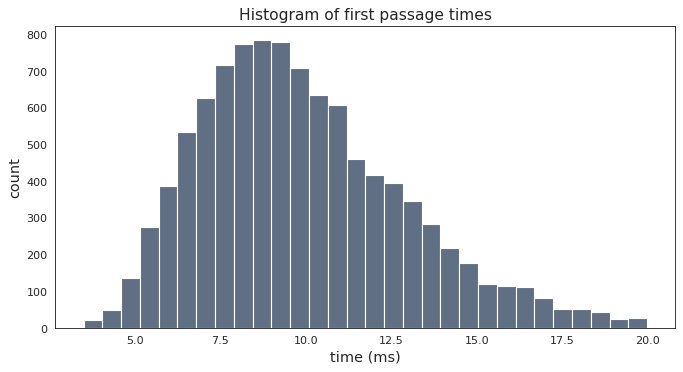

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,5), dpi=80)
ax.set_title('Histogram of first passage times', fontsize=14)
ax.set_xlabel('time (ms)', fontsize=13)
ax.set_ylabel('count', fontsize=13);
ax.hist(fp_times, bins=30);

## 3. Compare theoretical and estimations

---

> Generate a plot that compares the estimated distribution of first passage times (ie. a histogram with properly chosen bin size ∆t) with the theoretical prediction FPT distribution $\rho$(t) ∆t.

---

We observe that the FPT distribution and the theoretical distribution are very similar. 

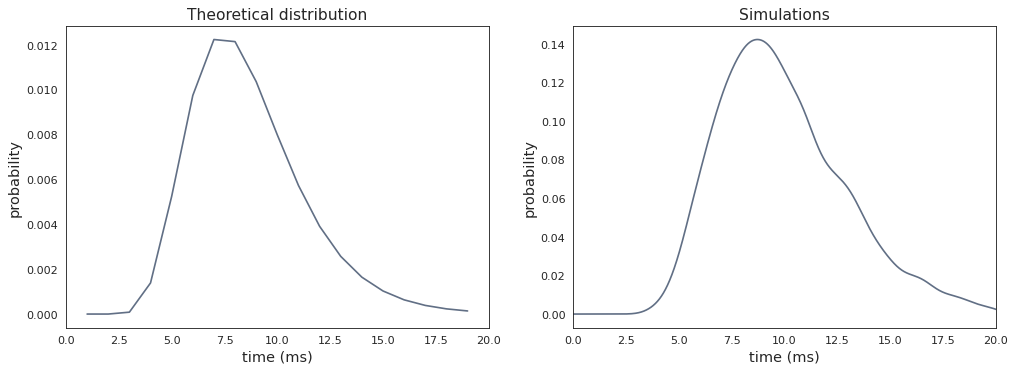

In [ ]:
'''
Define theoretical distribution & make density from histogram
'''
rho = lambda t: v_th /(np.sqrt(2 * np.pi) * sig * t**3/2) * np.exp(-((v_th - mu*t)**2) / (2*(sig**2)*t))
P_t = kde.gaussian_kde(fp_times) # density
t = np.linspace(0, T+dt, int(T/dt)) # time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), dpi=80)
ax1.set_title('Theoretical distribution', fontsize=14)
ax1.plot(rho(np.arange(0, T)))
ax1.set_xlabel('time (ms)', fontsize=13)
ax1.set_ylabel('probability', fontsize=13)
ax1.set_xlim([0, 20])

ax2.set_title('Simulations', fontsize=14)
ax2.plot(t, P_t(t))
ax2.set_xlabel('time (ms)', fontsize=13)
ax2.set_ylabel('probability', fontsize=13)
ax2.set_xlim([0, 20]);

## 4. Maximum likelihood


---

> Show that the maximum likelihood estimates are given by
\begin{align}
& \mu = \frac{1}{\bar{t}}
& \sigma^2 = f - \frac{1}{\bar{t}}
\end{align}
with 
\begin{align}
\bar{t} = \frac{1}{n} \sum_{i = 1}^{n} t_i \qquad \text{ and } \qquad 
f = \frac{1}{n} \sum_{i = 1}^{n} \frac{1}{t_i}
\end{align}
The log likelihood for observed FPTs $t_i, i = 1, \dots, n$ is
\begin{align}
  L &= \sum_{i=1}^n \log \rho(t_i | \mu, \sigma) \\
    &= n \log \frac{1}{\sigma} - \frac{3}{2} \sum_{i=1}^n \log t_i - \sum_{i=1}^n \frac{(1-\mu t_i)^2}{2 \sigma^2 t_i}
\end{align}

---

To find the maximum likelihood estimates we differentiate the Log likelihood with respect to $\mu$ and $\sigma$, then set them equal to zero.

For $\mu$ we get
\begin{align}
\frac{\partial L}{\partial \mu} &= 0 - \sum_{i=1}^n \frac{1}{2 \sigma^2 t_i} 2 (1 - \mu t_i) \cdot - t_i \\
      &= \sum_{i=1}^n \frac{2(1 - \mu t_i) \cdot t_i}{2 \sigma^2 t_i} \\
      &= \sum_{i=1}^n \frac{(1 - \mu t_i)}{\sigma^2} \\
      &= \frac{1}{\sigma^2} \sum_{i=1}^n (1-\mu t_i) \\
\end{align}
Setting this derivative equal to zero yields
\begin{align}
    0 &= \sum_{i=1}^n (1-\mu t_i) \\
      &= \sum_{i=1}^n 1 - \sum_{i=1}^n \mu t_i \\
      &= n - \mu \sum_{i=1}^n t_i \\
\end{align}
thus, 
\begin{align}
  \mu &= \frac{n}{\sum_{i=1}^n t_i} = \frac{1}{\bar{t}}
\end{align}



For $\sigma$ we get

\begin{align}
  \frac{\partial L}{\partial \sigma} &= \left(n \log \frac{1}{\sigma}\right)' - 0 - \left(\sum_{i=1}^n (1- \mu t_i)^2 \cdot \frac{1}{2 \sigma^2 t_i}   \right)'
\end{align}

The derivative of the left side is
\begin{align}
  \left(n \log \frac{1}{\sigma}\right)' &= - \frac{n}{\sigma}
\end{align}
And the derivative of the right side is
\begin{align}
\left(\sum_{i=1}^n (1- \mu t_i)^2 \cdot \frac{1}{2 \sigma^2 t_i}   \right)' &= \sum_{i=1}^n (1 - \mu t_i) \cdot - \frac{1}{(2 \sigma^2 t_i)^2} \cdot 4 \sigma t_i \\
&= - \sum_{i=1}^n (1 - \mu t_i)^2 \cdot \frac{1}{\sigma^3 t_i} \\
&= - \sum_{i=1}^n \frac{1 - 2 \mu t_i + \mu^2 t_i^2}{\sigma^3 t_i} \\
&= - \frac{1}{\sigma^3} \sum_{i=1}^n \frac{1 - 2 \mu t_i + \mu^2 t_i^2}{t_i} \\
&= - \frac{1}{\sigma^3} \left( \sum_{i=1}^n \frac{1}{t_i} - \sum_{i=1}^n \frac{2 \mu t_i}{t_i} + \sum_{i=1}^n \frac{\mu^2 t_i^2}{t_i} \right) \\
&= - \frac{1}{\sigma^3} \left( \sum_{i=1}^n \frac{1}{t_i} - 2 \mu n + \mu^2 \sum_{i=1}^n t_i \right) \\
\end{align}

Setting this equal to zero yields
\begin{align}
  0 &= -\frac{n}{\sigma} - \frac{1}{\sigma^3} \left( \sum_{i=1}^n \frac{1}{t_i} - 2 \mu n + \mu^2 \sum_{i=1}^n t_i \right) \\
  n  \sigma^{-1} &= \sigma^{-3} (.) \\
  n \sigma^2     &= \sum_{i=1}^n \frac{1}{t_i} - 2 \mu n + \mu^2 \sum_{i=1}^n t_i \\
    \sigma^2     &= \frac{1}{n} \left( \sum_{i=1}^n \frac{1}{t_i} - 2 \mu n + \mu^2 \sum_{i=1}^n t_i \right) \\
    &= \frac{1}{n} \sum_{i=1}^n \frac{1}{t_i} - 2 \mu + \frac{1}{n} \mu^2 \sum_{i=1}^n t_i \\
    &= f - 2 \frac{1}{\bar{t}} + \frac{1}{\bar{t}^2} \frac{1}{n} \sum_{i=1}^n t_i \\
    &= f - 2 \frac{1}{\bar{t}} + \frac{1}{\bar{t}^2} \bar{t} \\
    &= f - 2 \frac{1}{\bar{t}} + \frac{1}{\bar{t}} \\
    &= f - \frac{1}{\bar{t}}
\end{align}




## 5. Generate data with μ and σ

---

> Generate different datasets and compare the empirical estimates of μ and σ with the model values for distinct values for μ and σ.

---

We use the results from (4.) to get empirical estimates for mu and sigma.

In [ ]:
# create a range of values for mu and sigma
mu_vals = np.arange(0.1, 1, 0.2) 
sig_vals = np.arange(0.1, 1, 0.2)
ms = []
emp_mu = []
emp_sig = []
eps_mu = []
eps_sig = []

t = np.linspace(0, T, N) # time 
v = np.zeros((10000, N)) 

for mu in mu_vals:
  for sig in sig_vals:
    ms.append([round(mu, 1), round(sig, 1)])
    # create data with mu & sigma
    for k in range(N):
      if k == 0:
        continue
      else:
        v[:, k] = np.add(v[:, k-1] + mu*dt , np.random.normal(loc=0, scale=sig*np.sqrt(dt), size=(v.shape[0],)))

    fp_times = []
    for i in range(10000): 
      fpt = np.where(v[i] >= v_th) 
      if fpt[0].size == 0:
        continue
      # store first timepoint when threshold was hit
      fp_times.append((np.where(v[i] >= v_th)[0][0])*dt) 

    # use maximum likelihood estimates to get sample estimates
    t_bar = np.mean(fp_times)
    mu_hat = 1/t_bar
    sig_hat = np.sqrt(np.mean(1 / np.array(fp_times)) - mu_hat) 
    # store empirical estimates
    emp_mu.append(mu_hat)
    emp_sig.append(sig_hat)
    # store differences between specified and emperical value
    eps_mu.append(mu - mu_hat)
    eps_sig.append(sig - sig_hat)

In [ ]:
d = {'Specified mu and sigma': ms, 'empirical mu':emp_mu, 'empirical sigma':emp_sig, 'error mu': eps_mu, 'error sigma': eps_sig}

df = pd.DataFrame(data=d)

In [ ]:
df

,Specified mu and sigma,empirical mu,empirical sigma,error mu,error sigma
0,"[0.1, 0.1]",0.101165,0.097482,-0.001165,0.002518
1,"[0.1, 0.3]",0.134044,0.272610,-0.034044,0.027390
2,"[0.1, 0.5]",0.181126,0.456254,-0.081126,0.043746
3,"[0.1, 0.7]",0.232127,0.644351,-0.132127,0.055649
4,"[0.1, 0.9]",0.283808,0.851788,-0.183808,0.048212
5,"[0.3, 0.1]",0.298998,0.099243,0.001002,0.000757
6,"[0.3, 0.3]",0.299308,0.298219,0.000692,0.001781
7,"[0.3, 0.5]",0.304078,0.493337,-0.004078,0.006663
8,"[0.3, 0.7]",0.321944,0.678738,-0.021944,0.021262
9,"[0.3, 0.9]",0.358938,0.857703,-0.058938,0.042297


```
Student: Daphne Cornelisse (s1066862)
``` 